In [1]:
# 加载必要的库

import sys
import pandas as pd
import numpy as np
import sklearn
import random
import time

In [2]:
print(sys.version)

3.7.3 (default, Apr 24 2020, 18:51:23) 
[Clang 11.0.3 (clang-1103.0.32.62)]


In [3]:
from sklearn import ensemble

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 第一步：加载源数据集

In [7]:
data_raw = pd.read_csv('train.csv') 

data_val = pd.read_csv('test.csv')

In [8]:
# 显示部分数据

data_raw.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [9]:
data_val.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [10]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
# 列名称转换为小写格式

data_raw.columns = data_raw.columns.str.lower() #  转换为小写

data_val.columns = data_val.columns.str.lower() # 转换为小写

In [13]:
data_raw.head()

passengerid  survived  pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                name     sex   age  sibsp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   parch            ticket     fare cabin embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

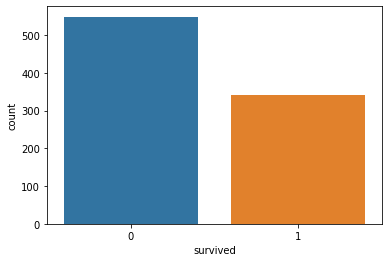

In [14]:
# 绘制图形

sns.countplot(data_raw['survived'])

In [15]:
# 合并两个数据集，进行统一的清洗

data_all = [data_raw, data_val]

### 数据清洗

In [16]:
data_raw.isnull().sum() # 查看训练集中的空值

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [17]:
data_val.isnull().sum() # 查看验证集是否有空值

passengerid      0
pclass           0
name             0
sex              0
age             86
sibsp            0
parch            0
ticket           0
fare             1
cabin          327
embarked         0
dtype: int64

In [18]:
# 对源数据集进行描述

data_raw.describe(include='all')

passengerid    survived      pclass  \
count    891.000000  891.000000  891.000000   
unique          NaN         NaN         NaN   
top             NaN         NaN         NaN   
freq            NaN         NaN         NaN   
mean     446.000000    0.383838    2.308642   
std      257.353842    0.486592    0.836071   
min        1.000000    0.000000    1.000000   
25%      223.500000    0.000000    2.000000   
50%      446.000000    0.000000    3.000000   
75%      668.500000    1.000000    3.000000   
max      891.000000    1.000000    3.000000   

                                                   name   sex         age  \
count                                               891   891  714.000000   
unique                                              891     2         NaN   
top     Stephenson, Mrs. Walter Bertram (Martha Eustis)  male         NaN   
freq                                                  1   577         NaN   
mean                                                NaN   NaN   29.699118   
std                                                 NaN   NaN   14.526497   
min                                                 NaN   NaN    0.420000   
25%                                                 NaN   NaN   20.125000   
50%                                                 NaN   NaN   28.000000   
75%                                                 NaN   NaN   38.000000   
max                                                 NaN   NaN   80.000000   

             sibsp       parch ticket        fare        cabin embarked  
count   891.000000  891.000000    891  891.000000          204      889  
unique         NaN         NaN    681         NaN          147        3  
top            NaN         NaN   1601         NaN  C23 C25 C27        S  
freq           NaN         NaN      7         NaN            4      644  
mean      0.523008    0.381594    NaN   32.204208          NaN      NaN  
std       1.102743    0.806057    NaN   49.693429          NaN      NaN  
min       0.000000    0.000000    NaN    0.000000          NaN      NaN  
25%       0.000000    0.000000    NaN    7.910400          NaN      NaN  
50%       0.000000    0.000000    NaN   14.454200          NaN      NaN  
75%       1.000000    0.000000    NaN   31.000000          NaN      NaN  
max       8.000000    6.000000    NaN  512.329200          NaN      NaN

In [21]:
# 对原始数据集（训练集+验证集）进行清理

for dataset in data_all:
    # 补足空缺值
    dataset['age'].fillna(dataset['age'].median(), inplace=True)
    dataset['fare'].fillna(dataset['fare'].median(), inplace=True)
    dataset['embarked'].fillna(dataset['embarked'].mode()[0], inplace=True)

In [22]:
# 删除一些字段
drop_columns = ['cabin', 'passengerid', 'ticket']

data_raw.drop(drop_columns, axis=1, inplace=True)

data_val.drop(drop_columns, axis=1, inplace=True)

In [23]:
data_raw.isnull().sum() # 训练集

survived    0
pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [24]:
data_val.isnull().sum() # 验证集

pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

#### 第三步：进行特征构建

In [33]:
for dataset in data_all:
    # 构建新的字段：
    # （1）family_size 家庭规模：sibsp + parch
    dataset['family_size'] = dataset['sibsp'] + dataset['parch'] + 1
    # （2）单身 single ,1 : 单身， 0 ：非单身
    dataset['single'] = 1 
    dataset['single'].loc[dataset['family_size'] > 1] = 0 # 0 ：不是单身
    # （3）身份 title
    dataset['title'] = dataset['name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
    # dataset['title'] = dataset['name'].apply(lambda x : x.split(,)[1]).apply(lambda x : x.split('.')[0])
    # （4） 票价 fare_bin
    dataset['fare_bin'] = pd.qcut(dataset['fare'], 4) # 根据票价，分成4组（每组的元素个数一致）
    # （5）年龄 age_bin
    dataset['age_bin'] = pd.cut(dataset['age'].astype(int), 5) # 根据年龄分组，分成5组（每组的元素不一致）

/Users/tommy/Torch/Torch/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [34]:
dataset.head()

pclass                                          name     sex   age  sibsp  \
0       3                              Kelly, Mr. James    male  34.5      0   
1       3              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2       2                     Myles, Mr. Thomas Francis    male  62.0      0   
3       3                              Wirz, Mr. Albert    male  27.0      0   
4       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1   

   parch     fare embarked  family_size  single title         fare_bin  \
0      0   7.8292        Q            1       1    Mr  (-0.001, 7.896]   
1      0   7.0000        S            2       0   Mrs  (-0.001, 7.896]   
2      0   9.6875        Q            1       1    Mr  (7.896, 14.454]   
3      0   8.6625        S            1       1    Mr  (7.896, 14.454]   
4      1  12.2875        S            3       0   Mrs  (7.896, 14.454]   

        age_bin  
0  (30.4, 45.6]  
1  (45.6, 60.8]  
2  (60.8, 76.0]  
3  (15.2, 30.4]  
4  (15.2, 30.4]

In [35]:
# 根据title统计人数

data_raw['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Mme               1
Jonkheer          1
Don               1
Lady              1
Ms                1
the Countess      1
Sir               1
Capt              1
Name: title, dtype: int64

In [36]:
title_names = (data_raw['title'].value_counts() < 10)

In [37]:
title_names

Mr              False
Miss            False
Mrs             False
Master          False
Dr               True
Rev              True
Major            True
Col              True
Mlle             True
Mme              True
Jonkheer         True
Don              True
Lady             True
Ms               True
the Countess     True
Sir              True
Capt             True
Name: title, dtype: bool

In [38]:
#  title ：将那些称谓所在的人数小于10的数据，全部归为一类：other
data_raw['title'] = data_raw['title'].apply(lambda x : 'other' if title_names[x] else x)

In [40]:
data_raw['title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
other      27
Name: title, dtype: int64

In [41]:
data_raw['survived'].groupby(data_raw['title']).mean()

title
Master    0.575000
Miss      0.697802
Mr        0.156673
Mrs       0.792000
other     0.444444
Name: survived, dtype: float64

### （二）构建新的字段，基于scikit-learn中的LabelEncoder()

In [42]:
data_raw.head()

survived  pclass                                               name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      sex   age  sibsp  parch     fare embarked  family_size  single title  \
0    male  22.0      1      0   7.2500        S            2       0    Mr   
1  female  38.0      1      0  71.2833        C            2       0   Mrs   
2  female  26.0      0      0   7.9250        S            1       1  Miss   
3  female  35.0      1      0  53.1000        S            2       0   Mrs   
4    male  35.0      0      0   8.0500        S            1       1    Mr   

          fare_bin       age_bin  
0   (-0.001, 7.91]  (16.0, 32.0]  
1  (31.0, 512.329]  (32.0, 48.0]  
2   (7.91, 14.454]  (16.0, 32.0]  
3  (31.0, 512.329]  (32.0, 48.0]  
4   (7.91, 14.454]  (32.0, 48.0]

In [43]:
label = LabelEncoder()

In [44]:
for dataset in data_all:
    # （1）新字段：sex_code
    dataset['sex_code'] = label.fit_transform(dataset['sex'])
    # （2）新字段：embarked_code
    dataset['embarked_code'] = label.fit_transform(dataset['embarked'])
    # （3）新字段：title_code
    dataset['title_code'] = label.fit_transform(dataset['title'])
    # （4）新字段：age_bin_code
    dataset['age_bin_code'] = label.fit_transform(dataset['age_bin'])
    # （5）新字段：fare_bin_code
    dataset['fare_bin_code'] = label.fit_transform(dataset['fare_bin'])

In [45]:
data_raw.head()

survived  pclass                                               name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      sex   age  sibsp  parch     fare embarked  family_size  single title  \
0    male  22.0      1      0   7.2500        S            2       0    Mr   
1  female  38.0      1      0  71.2833        C            2       0   Mrs   
2  female  26.0      0      0   7.9250        S            1       1  Miss   
3  female  35.0      1      0  53.1000        S            2       0   Mrs   
4    male  35.0      0      0   8.0500        S            1       1    Mr   

          fare_bin       age_bin  sex_code  embarked_code  title_code  \
0   (-0.001, 7.91]  (16.0, 32.0]         1              2           2   
1  (31.0, 512.329]  (32.0, 48.0]         0              0           3   
2   (7.91, 14.454]  (16.0, 32.0]         0              2           1   
3  (31.0, 512.329]  (32.0, 48.0]         0              2           3   
4   (7.91, 14.454]  (32.0, 48.0]         1              2           2   

   age_bin_code  fare_bin_code  
0             1              0  
1             2              3  
2             1              1  
3             2              3  
4             2              1

In [46]:
# 列的名称

data_raw.columns.tolist()

['survived',
 'pclass',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'family_size',
 'single',
 'title',
 'fare_bin',
 'age_bin',
 'sex_code',
 'embarked_code',
 'title_code',
 'age_bin_code',
 'fare_bin_code']

### 方式一：特征选择

In [47]:
Target = ['survived'] # 标签

In [48]:
data_columns_one = ['sex', 'pclass', 'embarked', 'title', 'sibsp', 'parch', 'age', 'fare', 'family_size', 
                    'single']

In [49]:
columns_one = Target + data_columns_one

### 方式二：特征选择

In [50]:
data_columns_two = ['sex_code', 'pclass', 'embarked_code', 'title_code', 'sibsp', 'parch', 'age', 'fare']

In [51]:
columns_two = Target + data_columns_two

### 方式三：特征选择

In [52]:
data_columns_three = ['sex_code', 'pclass', 'embarked_code', 'title_code', 'family_size', 'age_bin_code', 'fare_bin_code']

In [53]:
columns_three = Target + data_columns_three

### 通过Pandas中的get_dummies() 进行编码

In [54]:
data_one_dummy = pd.get_dummies(data_raw[data_columns_one])

In [55]:
data_one_dummy_list = data_one_dummy.columns.tolist()

In [99]:
len(data_one_dummy_list)

17

### 获取训练集和测试集

### 方式一：训练集和测试集

In [64]:
X_train_one, X_test_one, y_train_one, y_test_one = model_selection.train_test_split(data_one_dummy[data_one_dummy_list],
                                                                    data_raw[Target],
                                                                    random_state = 0)

In [65]:
X_train_one.shape

(668, 17)

In [66]:
X_test_one.shape

(223, 17)

### 方式二：训练集和测试集

In [63]:
X_train_two, X_test_two, y_train_two, y_test_tewo = model_selection.train_test_split(data_raw[data_columns_two],
                                                                                     data_raw[Target],
                                                                                     random_state=0)

In [67]:
X_train_two.shape

(668, 8)

In [68]:
X_test_two.shape

(223, 8)

### 方式三：训练集和测试集

In [69]:
X_train_three, X_test_three, y_train_three, y_test_three = model_selection.train_test_split(data_raw[data_columns_three],
                                                                                            data_raw[Target],
                                                                                            random_state=0)

In [70]:
X_train_three.shape

(668, 7)

### 随机森林算法实现

In [71]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

In [72]:
rf = RandomForestClassifier(max_features='auto',
                            random_state=1, 
                            n_jobs=-1)

In [73]:
param_gird = {
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf' : [1, 5, 10],
    'min_samples_split' : [2, 4, 10, 12, 16],
    'n_estimators' : [50, 100, 400, 700, 1000]
}

In [74]:
gs = GridSearchCV(estimator=rf,
                  param_grid=param_gird,
                  scoring= gyi'accuracy',
                  cv=3,
                  n_jobs=-1)

### (1) 对特征一进行训练

In [75]:
gs = gs.fit(X_train_one, y_train_one)

/Users/tommy/Torch/Torch/lib/python3.7/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [77]:
print(gs.best_score_)

0.8323839534601868


In [78]:
print(gs.best_params_)

{'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 50}


In [79]:
# 创建一个对象

rf2 = RandomForestClassifier(criterion='entropy',
                             min_samples_leaf=5,
                             min_samples_split=12,
                             n_estimators=50,
                             n_jobs=-1,
                             random_state=1)

In [80]:
rf2.fit(X_train_one, y_train_one)

/Users/tommy/Torch/Torch/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=12, n_estimators=50, n_jobs=-1,
                       random_state=1)

In [81]:
X_train_one.head()

pclass  sibsp  parch   age     fare  family_size  single  sex_female  \
105       3      0      0  28.0   7.8958            1       1           0   
68        3      4      2  17.0   7.9250            7       0           1   
253       3      1      0  30.0  16.1000            2       0           0   
320       3      0      0  22.0   7.2500            1       1           0   
706       2      0      0  45.0  13.5000            1       1           1   

     sex_male  embarked_C  embarked_Q  embarked_S  title_Master  title_Miss  \
105         1           0           0           1             0           0   
68          0           0           0           1             0           1   
253         1           0           0           1             0           0   
320         1           0           0           1             0           0   
706         0           0           0           1             0           0   

     title_Mr  title_Mrs  title_other  
105         1          0            0  
68          0          0            0  
253         1          0            0  
320         1          0            0  
706         0          1            0

In [83]:
# 根据特征的重要性排序
pd.concat((pd.DataFrame(X_train_one.iloc[:, 1:].columns, columns=['Variable']),
           pd.DataFrame(rf2.feature_importances_, columns=['importance'])),
           axis=1).sort_values(by='importance', ascending=False)

Variable  importance
7       sex_male    0.158834
14     title_Mrs    0.150353
4    family_size    0.138901
8     embarked_C    0.123423
3           fare    0.108769
0          sibsp    0.092098
5         single    0.053961
1          parch    0.042367
15   title_other    0.034270
2            age    0.019245
13      title_Mr    0.018788
11  title_Master    0.013603
9     embarked_Q    0.011775
6     sex_female    0.010531
10    embarked_S    0.010134
12    title_Miss    0.010098
16           NaN    0.002848

### 在test上进行预测

In [84]:
pred = rf2.predict(X_test_one)

In [85]:
pred_df = pd.DataFrame(pred, columns=['survived'])

In [86]:
pred_df.head()

survived
0         0
1         0
2         0
3         1
4         1

## !!! 注意：在最终的test.csv上预测

In [101]:
data_val_dummy = pd.get_dummies(data_val[data_columns_one])

In [102]:
data_val_dummy.head()

pclass  sibsp  parch   age     fare  family_size  single  sex_female  \
0       3      0      0  34.5   7.8292            1       1           0   
1       3      1      0  47.0   7.0000            2       0           1   
2       2      0      0  62.0   9.6875            1       1           0   
3       3      0      0  27.0   8.6625            1       1           0   
4       3      1      1  22.0  12.2875            3       0           1   

   sex_male  embarked_C  ...  embarked_S  title_Col  title_Dona  title_Dr  \
0         1           0  ...           0          0           0         0   
1         0           0  ...           1          0           0         0   
2         1           0  ...           0          0           0         0   
3         1           0  ...           1          0           0         0   
4         0           0  ...           1          0           0         0   

   title_Master  title_Miss  title_Mr  title_Mrs  title_Ms  title_Rev  
0             0           0         1          0         0          0  
1             0           0         0          1         0          0  
2             0           0         1          0         0          0  
3             0           0         1          0         0          0  
4             0           0         0          1         0          0  

[5 rows x 21 columns]

In [103]:
data_val_dummy_list = data_val_dummy.columns.tolist()

In [105]:
data_val_dummy_list

['pclass',
 'sibsp',
 'parch',
 'age',
 'fare',
 'family_size',
 'single',
 'sex_female',
 'sex_male',
 'embarked_C',
 'embarked_Q',
 'embarked_S',
 'title_Col',
 'title_Dona',
 'title_Dr',
 'title_Master',
 'title_Miss',
 'title_Mr',
 'title_Mrs',
 'title_Ms',
 'title_Rev']

In [108]:
pred_val = rf2.predict(data_val_dummy[[
                                         'pclass',
                                         'age',
                                         'fare',
                                         'family_size',
                                         'single',
                                         'sex_female',
                                         'sex_male',
                                         'embarked_C',
                                         'embarked_Q',
                                         'embarked_S',
                                         'title_Col',
                                         'title_Dona',
                                         'title_Dr',
                                         'title_Master',
                                         'title_Miss',
                                         'title_Mr',
                                         'title_Mrs',]])

In [109]:
pred_val_df = pd.DataFrame(pred_val, columns=['survived'])

In [111]:
pred_val_df.head(10)

survived
0         0
1         0
2         0
3         1
4         0
5         1
6         0
7         1
8         1
9         0